<a href="https://colab.research.google.com/github/Bazinga97/Deep-learning/blob/main/DL_zero_initialization_sigmoid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('ushape.csv')

In [9]:
df.head()



,x,y,class
0,0.0316,0.9870,0.0
1,2.1200,-0.0462,1.0
2,0.8820,-0.0758,0.0
3,-0.0551,-0.0373,1.0
4,0.8300,-0.5390,1.0


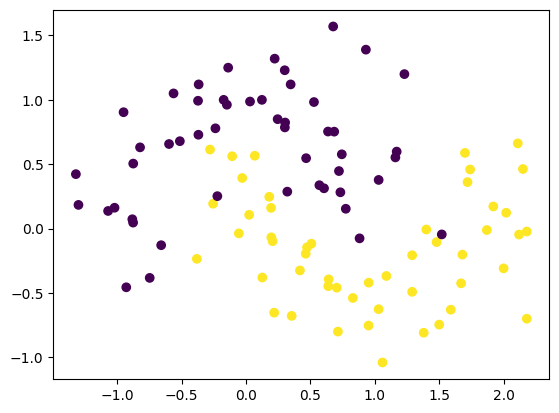

In [10]:
plt.scatter(df['x'],df['y'],c=df['class'])

In [13]:
x = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [15]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [16]:
model = Sequential()

model.add(Dense(10,activation='sigmoid',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

In [17]:
# Set parameters to 0
model.get_weights()

[array([[-0.05852985, -0.5125817 ,  0.40646857, -0.0008077 ,  0.6330548 ,
          0.5225906 , -0.067294  , -0.44728023,  0.5803849 , -0.06529725],
        [ 0.55994076, -0.10242158, -0.52950823,  0.6401946 , -0.22202826,
         -0.39454374, -0.46333462,  0.10357875,  0.02705526,  0.11792368]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.61207956],
        [ 0.5874234 ],
        [-0.33464247],
        [ 0.1370228 ],
        [ 0.48028547],
        [ 0.6810296 ],
        [-0.16468078],
        [-0.6903511 ],
        [-0.05778664],
        [ 0.41086286]], dtype=float32),
 array([0.], dtype=float32)]

In [18]:
initial_weights = model.get_weights()

In [19]:
initial_weights[0] = np.zeros(model.get_weights()[0].shape)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.zeros(model.get_weights()[2].shape)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)

In [20]:
model.set_weights(initial_weights)

In [21]:
model.get_weights()

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [22]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [23]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.4477 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4883 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4883 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3352 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4727 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5039 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5352 - loss: 0.6930 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4570 - loss: 0.6935 - val_accuracy: 0.5000 - val_loss:

In [24]:
model.get_weights()

[array([[ 0.42361724,  0.42361724,  0.42361724,  0.42361724,  0.42361724,
          0.42361724,  0.42361724,  0.42361724,  0.42361724,  0.42361724],
        [-0.4670084 , -0.4670084 , -0.4670084 , -0.4670084 , -0.4670084 ,
         -0.4670084 , -0.4670084 , -0.4670084 , -0.4670084 , -0.4670084 ]],
       dtype=float32),
 array([-0.14023876, -0.14023876, -0.14023876, -0.14023876, -0.14023876,
        -0.14023876, -0.14023876, -0.14023876, -0.14023876, -0.14023876],
       dtype=float32),
 array([[0.05164693],
        [0.05164693],
        [0.05164693],
        [0.05164693],
        [0.05164693],
        [0.05164693],
        [0.05164693],
        [0.05164693],
        [0.05164693],
        [0.05164693]], dtype=float32),
 array([-0.05881198], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step


<Axes: >

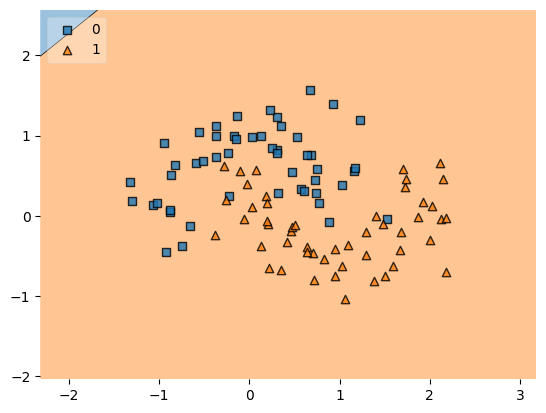

In [25]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)